# Simple Regression

In [ ]:
using Knet
include(Pkg.dir("Knet","data","housing.jl"))

In [2]:
using Gadfly

In [3]:
function train(w, x, y; lr=.1, epochs=20)
    for epoch= 1:epochs
        g = lossgradient(w, x,y)
        update!(w, g; lr=lr)
    end
    return w
end
predict(w,x) = w[1]* x.+ w[2]
loss(w,x,y) = (sum(abs2,y-predict(w,x))/size(x,2))
lossgradient = grad(loss)

(::gradfun) (generic function with 1 method)

In [4]:
test_ratio = 0.2;

In [5]:
epochs = 10000;
learning_rate = 0.001;

In [6]:
(x_train, y_train, x_test, y_test)=map(Array{Float32},Main.housing());

In [7]:
@printf("x training size: %s\ny training size: %s\n",size(x_train), size(y_train))

x training size: (13, 506)
y training size: (1, 506)


In [18]:
w = map(Array{Float32}, [0.1*randn(1,13), 0.1*randn(1,1)]);

In [14]:
# @time for epoch=1:epochs
#    train(w, x_train, y_train; lr=learning_rate, epochs=1)
#    println((:epoch, epoch, :trn, loss(w,x_train, y_train), :test, loss(w,x_test, y_test)))
# end

In [19]:
w

2-element Array{Array{Float32,2},1}:
 Float32[0.0516765 0.101303 … -0.0847607 0.029882]
 Float32[0.0166157]                               

In [15]:
train(w, x_train, y_train; lr=learning_rate, epochs=epochs)
println((:epoch, epochs, :trn, loss(w,x_train, y_train), :test, loss(w,x_test, y_test)))


(:epoch, 10000, :trn, 21.895195f0, :test, 21.895195f0)


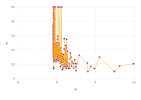

In [11]:
plot(layer(x=x_test[1,:],y=y_test,Theme(default_color=colorant"orange"),Geom.line),
    layer(x=x_train[1,:],y=y_train,Theme(default_color=colorant"purple")))

In [12]:
predict(w,x_test[:,506])

1×1 Array{Float32,2}:
 22.3496

In [13]:
y_test

1×506 Array{Float32,2}:
 24.0  21.6  34.7  33.4  36.2  28.7  …  16.8  22.4  20.6  23.9  22.0  11.9